In [ ]:
# cant use any of this, since it 

from vpython import *

scene1=canvas(background = color.black, width=600, length=600, center=vector(0,0,0))


x = sphere(radius = 0.1)

print(x.radius)

# pointer_x = arrow(pos=vector(0,0,0),axis = vector(1,0,0),shaft_width = 0.5,color=color.red)
# pointer_y = arrow(pos=vector(0,0,0),axis = vector(0,1,0),shaft_width = 0.5,color=color.green)
# pointer_y = arrow(pos=vector(0,0,0),axis = vector(0,0,1),shaft_width = 0.5,color=color.blue)

In [1]:
%matplotlib notebook
import stl
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


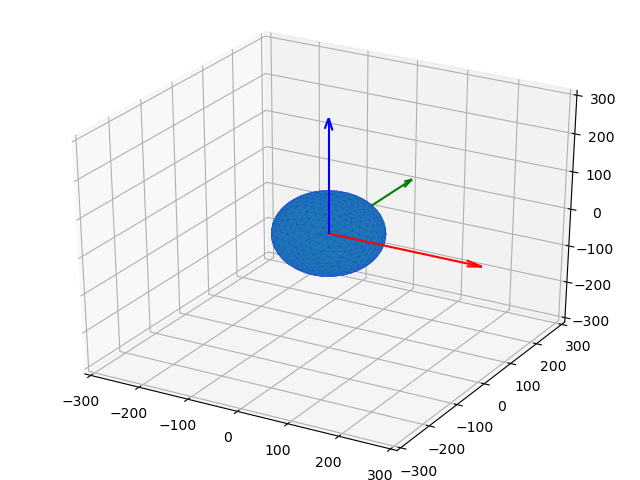

In [2]:
def plot_stl(stl_file,debug):
    figure = plt.figure()
    axes = mplot3d.Axes3D(figure)
    
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(stl_file.vectors,edgecolors='b',linewidth=0.05))
    scale = stl_file.points.flatten('C')
    axes.auto_scale_xyz(scale,scale,scale)
    
    
    if debug == True:
        x, y, z = np.zeros((3,3))
        ux, vx, wx = np.array([[1,0,0],[0,0,0],[0,0,0]])*100
        uy, vy, wy = np.array([[0,0,0],[0,1,0],[0,0,0]])*100
        uz, vz, wz = np.array([[0,0,0],[0,0,0],[0,0,1]])*100

#         utest,vtest,wtest = np.array([[1,0,0],[0,0,0],[0,0,0]])*100
        # print x y z for debugging
        axes.quiver(x,y,z,ux,vx,wx,arrow_length_ratio=0.1,color='r')
        axes.quiver(x,y,z,uy,vy,wy,arrow_length_ratio=0.1,color='g')
        axes.quiver(x,y,z,uz,vz,wz,arrow_length_ratio=0.1,color='b')

#         axes.quiver(x,y,z,utest,vtest,wtest,arrow_length_ratio=0.1,color='black')
        axes.quiver(0,0,0,100,100,100,arrow_length_ratio=0.1,color='black')
    
#     if rotate == True:
#         for angle in range(0, 360):
#             axes.view_init(30, angle)
#             plt.draw()
#             plt.pause(.001)
#     plt.show()

figure = plt.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = stl.mesh.Mesh.from_file("stl_data/unit_circle_radius_100_binary.stl")
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors,edgecolors='b',linewidths=0.05))

# Auto scale to the mesh size
scale = your_mesh.points.flatten('C')
axes.auto_scale_xyz(scale, scale, scale)
axes.set_xlim3d(left=-300,right=300)
axes.set_ylim3d(bottom=-300,top=300)
axes.set_zlim3d(bottom=-300,top=300)

axes.set_xmargin(1)
axes.set_ymargin(1)
axes.set_zmargin(1)
axes.scatter(0,0,0,s=200,c='r',marker='o')
x, y, z = np.zeros((3,3))
ux, vx, wx = np.array([[1,0,0],[0,0,0],[0,0,0]])*300
uy, vy, wy = np.array([[0,0,0],[0,1,0],[0,0,0]])*300
uz, vz, wz = np.array([[0,0,0],[0,0,0],[0,0,1]])*300

print
axes.quiver(x,y,z,ux,vx,wx,arrow_length_ratio=0.1,color='r')
axes.quiver(x,y,z,uy,vy,wy,arrow_length_ratio=0.1,color='g')
axes.quiver(x,y,z,uz,vz,wz,arrow_length_ratio=0.1,color='b')


# Show the plot to the screen
plt.show()


#### Converting to ascii for from a high resolution sphere(at expense of file space)

In [ ]:
your_mesh.save("stl_data/ascii_3d_sphere.stl",mode=stl.Mode.ASCII)

import numpy as np

#### adding multiple sphere together

In [5]:
import numpy as np

# functions for combine two different stl
# find the max dimensions, so we can know the bounding box, getting the height,
# width, length (because these are the step size)...
def find_mins_maxs(obj):
    minx = maxx = miny = maxy = minz = maxz = None
    for p in obj.points:
        # p contains (x, y, z)
        if minx is None:
            minx = p[stl.Dimension.X]
            maxx = p[stl.Dimension.X]
            miny = p[stl.Dimension.Y]
            maxy = p[stl.Dimension.Y]
            minz = p[stl.Dimension.Z]
            maxz = p[stl.Dimension.Z]
        else:
            maxx = max(p[stl.Dimension.X], maxx)
            minx = min(p[stl.Dimension.X], minx)
            maxy = max(p[stl.Dimension.Y], maxy)
            miny = min(p[stl.Dimension.Y], miny)
            maxz = max(p[stl.Dimension.Z], maxz)
            minz = min(p[stl.Dimension.Z], minz)
    return minx, maxx, miny, maxy, minz, maxz

def find_center(obj):
    minx,maxx,miny,maxy,minz,maxz = find_mins_maxs(obj)
    center_x = np.average([maxx,minx])
    center_y = np.average([maxy,miny])
    center_z = np.average([maxz,minz])
    print(center_x,center_y,center_z)
    
def find_obj_size(obj):
    minx,maxx,miny,maxy,minz,maxz = find_mins_maxs(obj)
    x = abs(maxx - minx)
    y = abs(maxy - miny)
    z = abs(maxz - minz)
    print(x,y,z)
    return x,y,z

def translate(_solid, step, padding, multiplier, axis):
    if 'x' == axis:
        items = 0, 3, 6
    elif 'y' == axis:
        items = 1, 4, 7
    elif 'z' == axis:
        items = 2, 5, 8
    else:
        raise RuntimeError('Unknown axis %r, expected x, y or z' % axis)

    # _solid.points.shape == [:, ((x, y, z), (x, y, z), (x, y, z))]
    _solid.points[:, items] += (step * multiplier) + (padding * multiplier)

### copy objects and also translating it
def copy_objs(obj, dims, num_rows, num_cols, num_layers):
    # obj = copy object
    # dims = tuple of x y and z of the translating distance
    # num_rows = number of in x direction
    # num_cols = number of copy in y direction
    # 
    w, l, h = dims
    copies = []
    for layer in range(num_layers):
        for row in range(num_rows):
            for col in range(num_cols):
                # skip the position where original being copied is
                if row == 0 and col == 0 and layer == 0:
                    continue
                _copy = stl.mesh.Mesh(obj.data.copy())
                # pad the space between objects by 10% of the dimension being
                # translated
                if col != 0:
                    translate(_copy, w, w / 10., col, 'x')
                if row != 0:
                    translate(_copy, l, l / 10., row, 'y')
                if layer != 0:
                    translate(_copy, h, h / 10., layer, 'z')
                copies.append(_copy)
    return copies

### Copy the objects 
def copy_obj(obj):
    # x,y,z
#     w,l,h = dims
    _copy = stl.mesh.Mesh(obj.data.copy())
    # translate x
#     translate(_copy, w, 0, 1, 'x')
#     # translate y
#     translate(_copy, l, 0, 1, 'y')
#     # translate z
#     translate(_copy, h, 0, 1, 'z')
    return(_copy)

# Scale object using rotation matrix
def scale_obj(obj,scale):
    scale_mat = np.identity(3)*scale
    stl.mesh.Mesh.rotate_using_matrix(obj,scale_mat)

def copy_scale_obj(obj,dims,scale):
    _copy = copy_obj(obj,dims)
    
    scale_obj(_copy,scale)
    
    return _copy
    
    
def translate_obj(obj,x,y,z,scale=1):
    translate(obj,x*scale,0,1,'x')
    translate(obj,y*scale,0,1,'y')
    translate(obj,z*scale,0,1,'z')

def rotate_obj(obj,x,y,z):
    obj.rotate([0.5,0,0],np.radians(x))
    obj.rotate([0,0.5,0],np.radians(y))
    obj.rotate([0,0,0.5],np.radians(z))

In [ ]:

###  Check List
# output x y z coordinates
# load in files
# 

main_body = stl.mesh.Mesh.from_file('stl_data/ascii_3d_sphere.stl')
  
# find the max values
minx, maxx, miny, maxy, minz, maxz = find_mins_maxs(main_body)

main_body_2 = stl.mesh.Mesh.from_file('stl_data/ascii_3d_sphere.stl')


x,y,z =find_obj_size(main_body_2)

print(x,y,z)

# translate(main_body_2,w2,w2/10.,3,'x')
# translate(main_body_2,w2,w2/10.,3,'x')


copy_1 = copy_objs(main_body,(x,y,z),1,1,2)

copy_2 = copy_obj(main_body,(x,y,z))


### Combined
#combined = mesh.Mesh(np.concatenate([main_body.data]+[i.data for i in copy_1]))
combined = stl.mesh.Mesh(np.concatenate([main_body.data,copy_2.data]))

# saving data
plot_stl(combined,1)
combined.save('stl_data/stl_test/combine_test.stl',mode=stl.Mode.ASCII)

In [ ]:
# two sphere of varying diameter

sphere_1 = stl.mesh.Mesh.from_file('stl_data/unit_circle_radius_100_stl.stl')
sphere_2 = stl.mesh.Mesh.from_file('stl_data/unit_circle_radius_100_stl.stl')
rot_mat = np.identity(3)*0.5


# stl.mesh.Mesh.rotate_using_matrix(sphere_1,rot_mat)
scale_obj(sphere_2,0.5)
translate(sphere_2,400,0,1,'x')

find_center(sphere_1)
find_obj_size(sphere_1)
find_center(sphere_2)
find_obj_size(sphere_2)


combined = stl.mesh.Mesh(np.concatenate([sphere_1.data,copy_2.data]))
plot_stl(combined,1)

In [ ]:
# Mesh


coord = np.genfromtxt('nacl_v1_coord.csv',delimiter=',',skip_header=1)
# print(coord)
sphere = stl.mesh.Mesh.from_file('stl_data/unit_circle_radius_100_stl.stl')
x_len,y_len,z_len =find_obj_size(sphere)
#print(x_len,y_len,z_len)
# append the list
item_list = []
for i in range(len(coord)):
    # 
#     obj_coord = (coord[i,0]*z_len,coord[i,1]*z_len,coord[i,2]*z_len)
    #   print(obj_coord)
#     obj = copy_scale_obj(sphere,obj_coord,coord[i,3])

    # scale then translate
#         scale_obj(sphere_2,0.5)
#         translate(sphere_2,400,0,1,'x')
    obj = copy_obj(sphere)
    scale_obj(obj,scale=coord[i,3])
    translate(obj,coord[i,0]*z_len/2,0,1,'x')
    translate(obj,coord[i,1]*z_len/2,0,1,'y')
    translate(obj,coord[i,2]*z_len/2,0,1,'z')

    item_list.append(obj)


# print(len(item_list))
# combine and output s stl   
combined = stl.mesh.Mesh(np.concatenate([i.data for i in item_list]))




plot_stl(combined,1)
combined.save('stl_data/stl_test/multi_varying_size.stl',mode=stl.Mode.ASCII)

In [ ]:
# Mesh

# coordinates 
coord = np.genfromtxt('nacl_v1_coord.csv',delimiter=',',skip_header=1)
sphere = stl.mesh.Mesh.from_file('stl_data/unit_circle_radius_100_stl.stl')
x_len,y_len,z_len =find_obj_size(sphere)

# append the list
item_list = []
for i in range(len(coord)):
    obj = copy_obj(sphere)
    scale_obj(obj,scale=coord[i,3])
    translate_obj(obj,coord[i,0],coord[i,1],coord[i,2],z_len/2)
    item_list.append(obj)

# combine stl
combined = stl.mesh.Mesh(np.concatenate([i.data for i in item_list]))

plot_stl(combined,1)
combined.save('stl_data/stl_test/multi_varying_size.stl',mode=stl.Mode.ASCII)

In [ ]:
# plotting sphere

edge_cylinder = stl.mesh.Mesh.from_file('stl_data/cylinder_rad1_len10_edgecenter.stl')
center_cylinder = stl.mesh.Mesh.from_file('stl_data/cylinder_rad1_len10_midcenter.stl')

obj = copy_obj(edge_cylinder)
translate_obj(obj,4,0,0)

scale = np.array(([1,0,0],[0,1,0],[0,0,2]))
scale_obj(obj,scale)


find_obj_size(obj)

# add in sphere
sphere = stl.mesh.Mesh.from_file('stl_data/unit_circle_radius_100_stl.stl')
scale_obj(sphere,0.02)
translate_obj(sphere,0,0,10)
combined = stl.mesh.Mesh(np.concatenate([edge_cylinder.data,obj.data,sphere.data]))


plot_stl(combined,1)
stl.mesh.Mesh.remove_duplicate_polygons(combined.data)
combined.save('stl_data/stl_test/testing_cylinder.stl',mode=stl.Mode.ASCII)

2.0 10.0 2.0


<IPython.core.display.Javascript object>


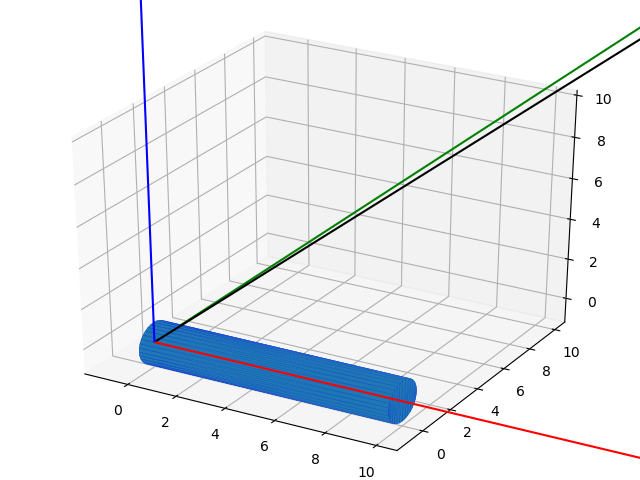

In [81]:
# rotating y direction
edge_cylinder = stl.mesh.Mesh.from_file('stl_data/cylinder_rad1_len10_edgecenter.stl')

obj_y = copy_obj(edge_cylinder)

# obj_y.rotate([0.5,0,0],np.radians(90))
rotate_obj(obj_y,90,0,0)

# plot_stl(obj_y,1)

find_obj_size(obj_y)
obj_y.save('stl_data/stl_test/cylinder_rad1_len10_edgecenter_y.stl',mode=stl.Mode.ASCII)

# rotating on x direction
obj_x = copy_obj(edge_cylinder)

rotate_obj(obj_x,0,-90,0)
# plot_stl(obj_x,1)

obj_x.save('stl_data/stl_test/cylinder_rad1_len10_edgecenter_x.stl',mode=stl.Mode.ASCII)


obj_test = copy_obj(obj_x)


# def skew(x):
#     return np.array([[0, -x[2], x[1]],
#                      [x[2], 0, x[0]],
#                      [x[1], x[0], 0]])

# # def vector_obj_cylinder(obj,vec_1,vec_2):
# vec_1 = np.array([1,0,0])
# vec_2 = np.array([1,1,1])

# ## step to rotate apply the rotation matrix

# # 1 . normalize vectors
# vec_1 = np.transpose(vec_1 / np.linalg.norm(vec_1,2))
# vec_2 = np.transpose(vec_2 / np.linalg.norm(vec_2,2))

# # 2 . find the angle between vectors
# cos_angle = (np.dot(vec_1,vec_2))
# # print(angle)

# # 3. compute the rotation matrix
# # s = np.sin(angle)
# v = np.cross(vec_1,vec_2)
# c = np.dot(vec_1,vec_2)*cos_angle
# skewv = skew(v)
# rot_mat= np.eye(3) + skewv+ skewv**2*(1/(1+c))
# print(rot_mat)

# # test 2 
# u = vec_1
# v = vec_2
# w = np.cross(u,v)
# w_hat = skew(w)
# # 2  rotation angle
# cos_tht = u*np.transpose(v)/np.linalg.norm(u)/np.linalg.norm(v)
# tht = np.arccos(cos_tht)
# # 3 rotation matrix
# R = np.eye(3)+w_hat*np.sin(tht)+w_hat**2*(1-np.cos(tht))
# print(R)
# obj_test.rotate_using_matrix(R)

plot_stl(obj_test,1)

In [ ]:
sphere = stl.mesh.Mesh.from_file('stl_data/unit_circle_radius_100_stl.stl')
edge_cylinder = stl.mesh.Mesh.from_file('stl_data/cylinder_rad1_len10_edgecenter.stl')


